In [21]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Define the directory containing the text files
directory = '/Users/mistryk2/Desktop/Pressure_Data'

# Use glob to get all text files in the directory
file_paths = glob.glob(f"{directory}/*.txt")
print(file_paths)

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop over each file path
for file_path in file_paths:
    # Read the file into a DataFrame
    df = pd.read_csv(file_path, sep='\t', skiprows=2, decimal=',')
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Display the final DataFrame
print(final_df.head())

# Convert the 'Date' and 'Hour' columns to a single datetime column
final_df['Datetime'] = pd.to_datetime(final_df['Date'] + ' ' + final_df['Hour'], dayfirst=True)


final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9
GasPressure = final_df.sort_values(by='UnixTime')
display(GasPressure)

['/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-27.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-26.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-18.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-09.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-24.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-30.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-25.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-08-08.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-19.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-21.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-09.txt', '/Users/mistryk2/Desktop/Pressure_Data/GAS_Pressure_Data_Report_2024-06-08.txt', '/Users/mistryk2/Desktop/Pr

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_29058/2383214484.py:33: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9


,Date,Hour,PG1,PG2,PG3,PG5,PG6,PG7,PG8,DF,Datetime,UnixTime
1293797,08/05/2024,23:58:30,0.0,9.016,4.185,3.858,3.634,0.088,0.907,0.798,2024-05-08 23:58:30,1715212710
1293798,08/05/2024,23:58:32,0.0,9.026,4.185,3.904,3.701,0.091,0.910,0.798,2024-05-08 23:58:32,1715212712
1293799,08/05/2024,23:58:34,0.0,9.021,4.182,3.862,3.698,0.091,0.907,0.798,2024-05-08 23:58:34,1715212714
1293800,08/05/2024,23:58:36,0.0,9.010,4.181,3.902,3.601,0.088,0.906,0.798,2024-05-08 23:58:36,1715212716
1293801,08/05/2024,23:58:38,0.0,9.005,4.184,3.858,3.732,0.093,0.908,0.798,2024-05-08 23:58:38,1715212718
...,...,...,...,...,...,...,...,...,...,...,...,...
2389697,11/08/2024,9:31:05,0.0,9.021,4.138,3.944,3.808,0.074,0.827,0.800,2024-08-11 09:31:05,1723368665
2389698,11/08/2024,9:31:07,0.0,9.016,4.137,3.942,3.639,0.082,0.823,0.801,2024-08-11 09:31:07,1723368667
2389699,11/08/2024,9:31:09,0.0,9.047,4.134,3.939,3.835,0.090,0.824,0.796,2024-08-11 09:31:09,1723368669
2389700,11/08/2024,9:31:11,0.0,9.010,4.138,3.926,3.658,0.072,0.826,0.800,2024-08-11 09:31:11,1723368671


In [22]:
# Now load in the dice

# Define the directory containing the text files
directory = '/Users/mistryk2/Desktop/Dice_Temps/'

# Use glob to get all text files in the directory
file_paths = glob.glob(f"{directory}/*.txt")
print(file_paths)

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop over each file path
for file_path in file_paths:
    # Read the file into a DataFrame
    df = pd.read_csv(file_path, sep='\t', skiprows=2, decimal=',', encoding='ISO-8859-1')
    # df = df.loc[:, ~df.columns.str.contains('V')]
    # df = df.loc[:, ~df.columns.str.contains('(A)')]
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# # Filter columns with names containing '(ºC) T'
# filtered_columns = df.filter(like='(ºC) T')

# # Calculate the mean of these columns by row
# final_df['Mean_DICE_T'] = filtered_columns.mean(axis=1)

# # Optionally, drop the original columns if they are no longer needed
# final_df = final_df.drop(columns=filtered_columns.columns)
# final_df = final_df.fillna(0)

# Display the final DataFrame
print(final_df.head())

# Convert the 'Date' and 'Hour' columns to a single datetime column
final_df['Datetime'] = pd.to_datetime(final_df['Date'] + ' ' + final_df['Hour'], dayfirst=True)


final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9
SiPM_Temps = final_df.sort_values(by='UnixTime')
display(SiPM_Temps)

['/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-12.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-13.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-11.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-07-28.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-07-29.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-10.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-14.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-28.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-29.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-15.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-17.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-05-16.txt', '/Users/mistryk2/Desktop/Dice_Temps/TP_SiPM_BS_Data_Report_2024-06-20.txt', '/Users/mis

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_29058/2480464721.py:43: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  final_df['UnixTime'] = final_df['Datetime'].astype(int) // 10**9


,Date,Hour,DICE0(V) V,DICE1(V) V,DICE2(V) V,DICE3(V) V,DICE4(V) V,DICE5(V) V,DICE6(V) V,DICE7(V) V,...,DICE48(A) I,DICE49(A) I,DICE50(A) I,DICE51(A) I,DICE52(A) I,DICE53(A) I,DICE54(A) I,DICE55(A) I,Datetime,UnixTime
614006,08/05/2024,23:57:51,0.011802,0.097854,0.170968,0.019474,0.010942,0.011616,0.148614,0.292822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-08 23:57:51,1715212671
614007,08/05/2024,23:58:51,0.012534,0.098420,0.171182,0.019572,0.011020,0.011726,0.148794,0.292776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-08 23:58:51,1715212731
614008,08/05/2024,23:59:51,0.011988,0.098692,0.171184,0.018950,0.010800,0.012224,0.148758,0.292986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-08 23:59:51,1715212791
614009,09/05/2024,0:00:51,0.012156,0.098656,0.171180,0.019242,0.010506,0.011648,0.149146,0.293234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-09 00:00:51,1715212851
614010,09/05/2024,0:01:51,0.012150,0.099300,0.171164,0.018858,0.010704,0.011894,0.148510,0.293632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-09 00:01:51,1715212911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448394,11/08/2024,9:30:17,0.011008,0.018160,0.012500,0.106334,0.085180,6.762530,0.017940,0.008154,...,2.580000e-08,3.120000e-08,2.580000e-08,8.480000e-08,1.352000e-07,1.840000e-08,1.984000e-07,1.392000e-07,2024-08-11 09:30:17,1723368617
448395,11/08/2024,9:30:22,0.011008,0.017246,0.011736,0.106374,0.084158,6.762530,0.017446,0.008740,...,1.100000e-08,5.340000e-08,2.740000e-08,8.480000e-08,1.352000e-07,2.180000e-08,1.984000e-07,2.258000e-07,2024-08-11 09:30:22,1723368622
448396,11/08/2024,9:30:27,0.011684,0.017818,0.012212,0.106374,0.084158,6.762130,0.017074,0.008676,...,1.100000e-08,5.340000e-08,2.740000e-08,9.700000e-08,1.154000e-07,2.180000e-08,1.754000e-07,2.258000e-07,2024-08-11 09:30:27,1723368627
448397,11/08/2024,9:30:32,0.011684,0.017818,0.012212,0.105772,0.085428,6.762130,0.017074,0.008676,...,1.100000e-08,5.340000e-08,2.740000e-08,9.700000e-08,1.154000e-07,2.180000e-08,1.754000e-07,2.258000e-07,2024-08-11 09:30:32,1723368632


,PG1,PG2,PG3,PG5,PG6,PG7,PG8,DF,UnixTime,PG3Delta,PG6Delta
Datetime,,,,,,,,,,,
2024-05-09 00:00:00,5.947193e-07,8.857147,4.183374,3.882714,3.671028,0.090009,0.905744,0.797307,1.715215e+09,0.000000,0.000000
2024-05-09 01:00:00,3.908306e-06,8.854818,4.182832,3.884572,3.672597,0.090408,0.905835,0.797152,1.715218e+09,-0.000542,0.001569
2024-05-09 02:00:00,3.398056e-06,8.860112,4.182094,3.886064,3.673068,0.090645,0.905866,0.797070,1.715222e+09,-0.001279,0.002040
2024-05-09 03:00:00,1.238403e-05,8.858398,4.181942,3.887151,3.673015,0.091315,0.905947,0.797178,1.715225e+09,-0.001432,0.001987
2024-05-09 04:00:00,2.361164e-05,8.858296,4.181669,3.889124,3.671989,0.091617,0.906013,0.797116,1.715229e+09,-0.001704,0.000961
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-11 05:00:00,3.612859e-04,9.088563,4.137466,3.949562,3.754258,0.086109,0.822078,0.798517,1.723354e+09,-0.045908,0.083230
2024-08-11 06:00:00,4.335016e-04,9.081671,4.137847,3.950321,3.754537,0.086298,0.822361,0.798185,1.723358e+09,-0.045526,0.083509
2024-08-11 07:00:00,3.640313e-04,9.092303,4.138149,3.949474,3.754981,0.086137,0.822502,0.798333,1.723361e+09,-0.045225,0.083953


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


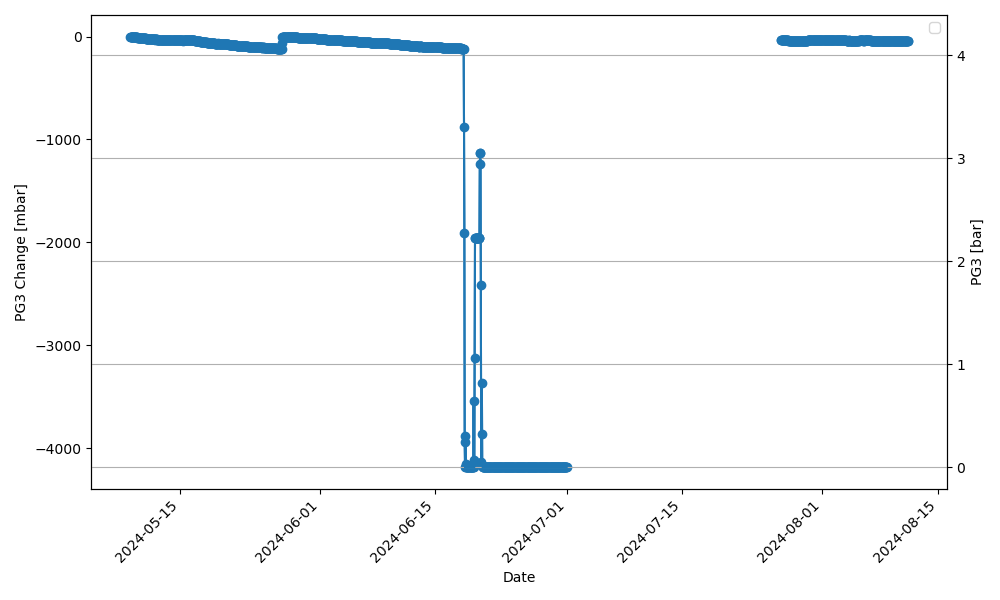

In [23]:
%matplotlib widget


# filtered_df = GasPressure[GasPressure['Datetime'] > pd.Timestamp('2024-07-30')]
# filtered_df = filtered_df[filtered_df['Datetime'] < pd.Timestamp('2024-07-29')]

filtered_df = GasPressure[GasPressure['Datetime'] > pd.Timestamp('2024-05-09')]
# filtered_df = filtered_df[filtered_df['Datetime'] < pd.Timestamp('2024-06-07')]



filtered_df.set_index('Datetime', inplace=True)

hourly_means_gas = filtered_df.resample('H').mean()
hourly_means_gas["PG3Delta"] = hourly_means_gas["PG3"] - hourly_means_gas["PG3"].iloc[0]
hourly_means_gas["PG6Delta"] = hourly_means_gas["PG6"] - hourly_means_gas["PG6"].iloc[0]


display(hourly_means_gas)

# Plot Date vs PG3
fig, ax1 = plt.subplots(figsize=(10, 6))

# ax1.plot(hourly_means_gas.index, hourly_means_gas['PG3Delta']*1000, marker='o', linestyle='-')
ax1.plot(hourly_means_gas.index, hourly_means_gas['PG3Delta']*1000, marker='o', linestyle='-')
ax1.set_xlabel('Date')
ax1.set_ylabel('PG3 Change [mbar]')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(hourly_means_gas.index, hourly_means_gas['PG3'])
# ax2.plot(hourly_means_gas.index, hourly_means_gas['PG6'])
ax2.tick_params(axis='y')
ax2.set_ylabel('PG3 [bar]')
ax2.grid()


for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

fig.tight_layout()

# plt.plot(hourly_means_gas.index, hourly_means_gas['PG3'], label='PG3', marker='o', linestyle='-')
# # plt.plot(filtered_df['Datetime'], Smooth_PG3, label='PG3', linestyle='-')
# plt.xlabel('Date')
# plt.ylabel('PG3')
# plt.title('Date vs PG3')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# plt.ylim(4.14,4.16)

,DICE0(V) V,DICE1(V) V,DICE2(V) V,DICE3(V) V,DICE4(V) V,DICE5(V) V,DICE6(V) V,DICE7(V) V,DICE8(V) V,DICE9(V) V,...,DICE47(A) I,DICE48(A) I,DICE49(A) I,DICE50(A) I,DICE51(A) I,DICE52(A) I,DICE53(A) I,DICE54(A) I,DICE55(A) I,UnixTime
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-06 00:00:00,0.012101,0.018879,0.012581,0.107678,0.086309,6.752056,0.017848,0.008979,0.011797,0.043381,...,1.847992e-07,2.841556e-08,3.132139e-08,3.322000e-08,9.636444e-08,1.233186e-07,3.504389e-08,1.798361e-07,1.687092e-07,1.722904e+09
2024-08-06 01:00:00,0.012084,0.018747,0.012576,0.107583,0.086301,6.752483,0.017842,0.008937,0.011675,0.043374,...,1.801894e-07,2.824306e-08,3.413083e-08,3.102861e-08,9.747750e-08,1.194539e-07,3.054972e-08,1.830544e-07,1.678014e-07,1.722908e+09
2024-08-06 02:00:00,0.011991,0.018565,0.012428,0.107135,0.085891,6.752689,0.017700,0.008877,0.011712,0.043159,...,1.905283e-07,2.880750e-08,3.671583e-08,3.123083e-08,9.995833e-08,1.228544e-07,3.075139e-08,1.790836e-07,1.675358e-07,1.722911e+09
2024-08-06 03:00:00,0.012053,0.018532,0.012438,0.106999,0.085815,6.753420,0.017772,0.008861,0.011697,0.043126,...,1.814556e-07,2.991972e-08,3.656222e-08,3.065556e-08,9.315250e-08,1.231133e-07,3.036056e-08,1.778572e-07,1.604739e-07,1.722915e+09
2024-08-06 04:00:00,0.012043,0.018354,0.012421,0.106873,0.085642,6.753335,0.017667,0.008849,0.011663,0.043019,...,1.847103e-07,2.936417e-08,3.593167e-08,3.110417e-08,9.567639e-08,1.223761e-07,3.074806e-08,1.824269e-07,1.672047e-07,1.722919e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-11 05:00:00,0.012505,0.018358,0.012633,0.106528,0.085469,6.761368,0.017804,0.009032,0.011633,0.043090,...,1.804386e-07,2.854417e-08,4.147944e-08,2.750278e-08,9.503583e-08,1.172725e-07,2.862861e-08,1.826469e-07,1.657300e-07,1.723354e+09
2024-08-11 06:00:00,0.012440,0.018287,0.012547,0.106270,0.085219,6.761240,0.017686,0.008958,0.011577,0.042974,...,1.856447e-07,2.852583e-08,4.187250e-08,2.893278e-08,8.920444e-08,1.185756e-07,2.789778e-08,1.759808e-07,1.692172e-07,1.723358e+09
2024-08-11 07:00:00,0.012383,0.018260,0.012594,0.106599,0.085460,6.761413,0.017779,0.008993,0.011581,0.043103,...,1.887286e-07,2.770139e-08,4.167000e-08,2.707750e-08,9.486778e-08,1.256239e-07,2.721667e-08,1.812961e-07,1.650906e-07,1.723361e+09


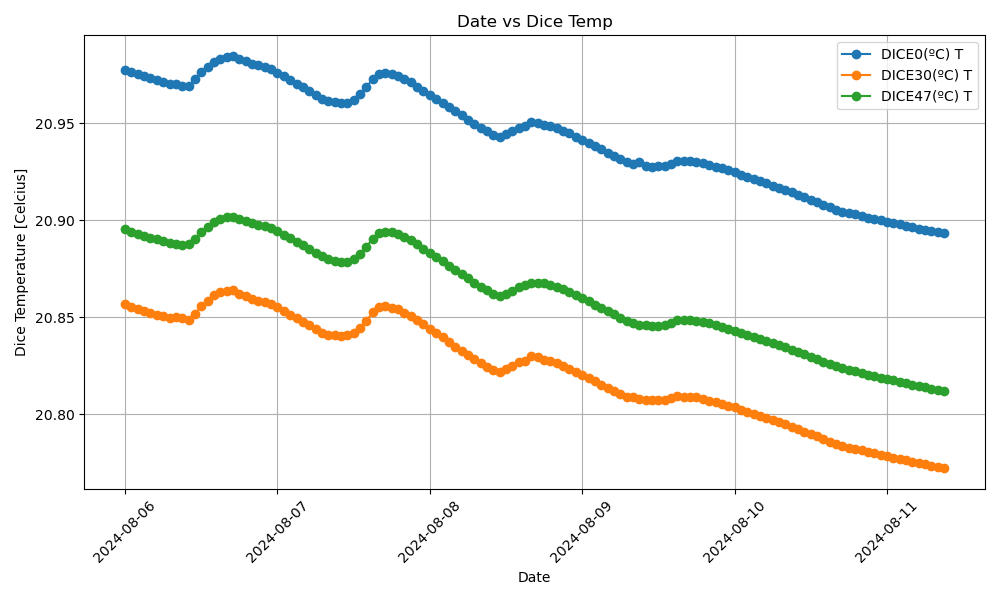

(20.0, 23.0)

In [29]:
%matplotlib widget


SiPM_Temps_filter = SiPM_Temps[SiPM_Temps['Datetime'] > pd.Timestamp('2024-08-06')]
# SiPM_Temps_filter = SiPM_Temps_filter[SiPM_Temps_filter['Datetime'] < pd.Timestamp('2024-07-29')]

# SiPM_Temps_filter = SiPM_Temps[SiPM_Temps['Datetime'] > pd.Timestamp('2024-05-09')]
# SiPM_Temps_filter = SiPM_Temps_filter[SiPM_Temps_filter['Datetime'] < pd.Timestamp('2024-06-07')]


SiPM_Temps_filter.set_index('Datetime', inplace=True)

hourly_means_sipm = SiPM_Temps_filter.resample('H').mean()
display(hourly_means_sipm)

# Plot Date vs PG3
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE0(ºC) T'], label='DICE0(ºC) T', marker='o', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE30(ºC) T'], label='DICE30(ºC) T', marker='o', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE47(ºC) T'], label='DICE47(ºC) T', marker='o', linestyle='-')
# plt.plot(filtered_df['Datetime'], SmSiPM_Tempsabel='PG3', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Dice Temperature [Celcius]')
plt.title('Date vs Dice Temp')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.ylim(20,23)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


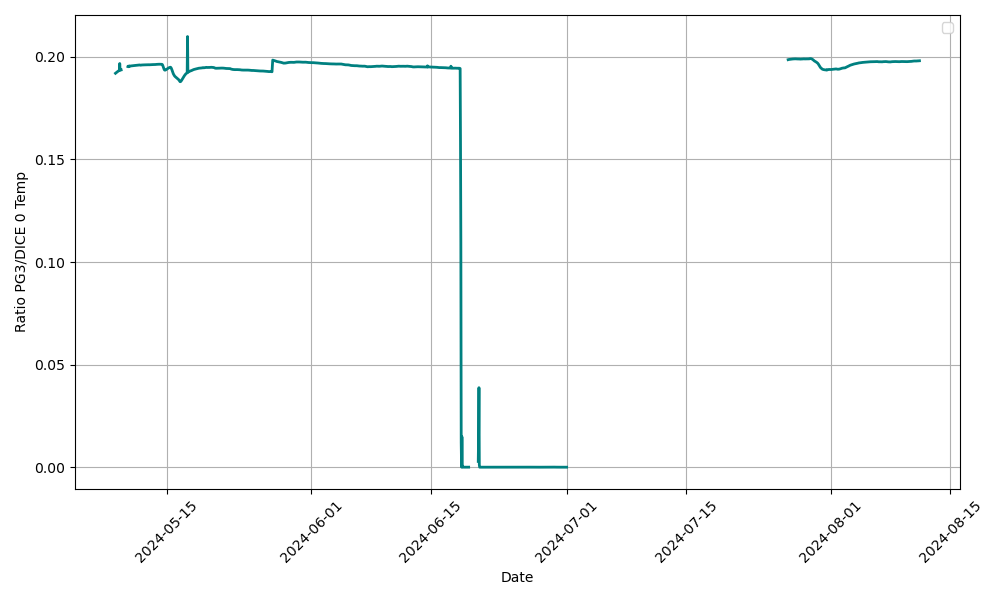

In [25]:
%matplotlib widget

# Plot Date vs PG3
plt.figure(figsize=(10, 6))

Pressure_norm = (hourly_means_gas['PG3'] - min(hourly_means_gas['PG3']))/max(hourly_means_gas['PG3']- min(hourly_means_gas['PG3']))
SiPM_norm0  = (hourly_means_sipm['DICE0(ºC) T'] - min(hourly_means_sipm['DICE0(ºC) T']))/max(hourly_means_sipm['DICE0(ºC) T'] - min(hourly_means_sipm['DICE0(ºC) T']))
# SiPM_norm10  = (hourly_means_sipm['DICE10(ºC) T'] - min(hourly_means_sipm['DICE10(ºC) T']))/max(hourly_means_sipm['DICE10(ºC) T'] - min(hourly_means_sipm['DICE10(ºC) T']))
# SiPM_norm30  = (hourly_means_sipm['DICE30(ºC) T'] - min(hourly_means_sipm['DICE30(ºC) T']))/max(hourly_means_sipm['DICE30(ºC) T'] - min(hourly_means_sipm['DICE30(ºC) T']))

# plt.plot(hourly_means_gas.index, Pressure_norm, label='PG3', marker='o', linestyle='-')
# plt.plot(hourly_means_sipm.index, SiPM_norm0, label='DICE0(ºC) T', marker='o', linestyle='-')


plt.plot(hourly_means_sipm.index,  hourly_means_gas['PG3']/hourly_means_sipm['DICE0(ºC) T'], color= "Teal", linewidth = 2)

plt.xlabel('Date')
# plt.ylabel('Normalized Amplitude')
plt.ylabel('Ratio PG3/DICE 0 Temp')
# plt.title('Date vs PG3')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.ylim(0.18,0.22)
plt.tight_layout()

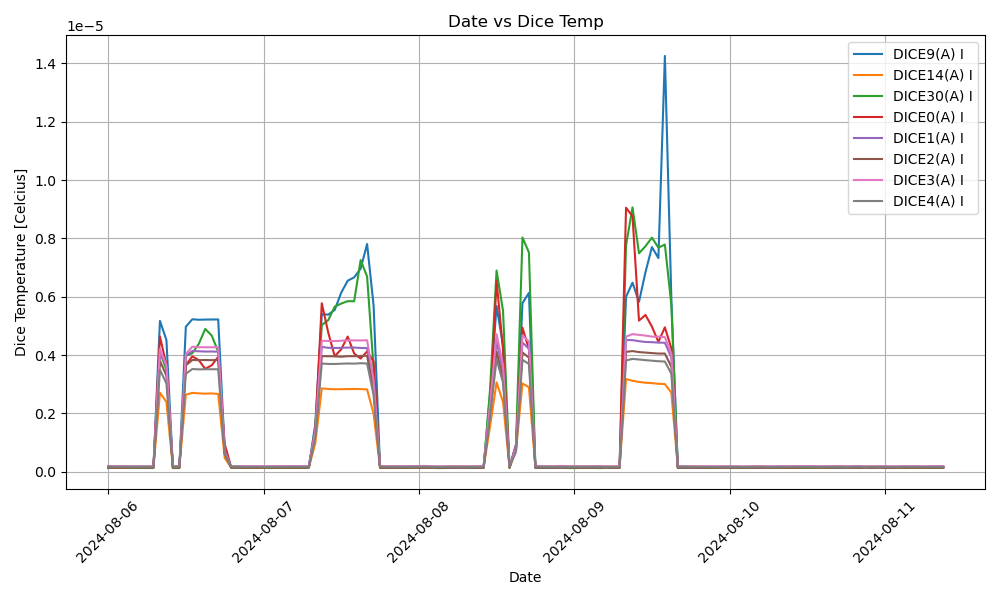

1.2081467625353567e-06
1.0041763004803825e-06


In [39]:
import numpy as np
# Plot Date vs PG3
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE9(A) I'], label='DICE9(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE14(A) I'], label='DICE14(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE30(A) I'], label='DICE30(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE0(A) I'], label='DICE0(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE1(A) I'], label='DICE1(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE2(A) I'], label='DICE2(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE3(A) I'], label='DICE3(A) I', linestyle='-')
plt.plot(hourly_means_sipm.index, hourly_means_sipm['DICE4(A) I'], label='DICE4(A) I', linestyle='-')
# plt.plot(filtered_df['Datetime'], SmSiPM_Tempsabel='PG3', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Dice Temperature [Celcius]')
plt.title('Date vs Dice Temp')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# plt.ylim(20,23)
print(np.mean(hourly_means_sipm['DICE0(A) I']))
print(np.mean(hourly_means_sipm['DICE2(A) I']))